# Linear Regression with Scikit-learn
## Part one: Data Setup and Model training
* Previously, we explored "Is there a relationship between **total advertising spend** and **sales**"?
* Now we want to expand this to "What is the relationship between **each advertising channel (TV, Radio, Newspaper)** and **sales**"?

---
### Import environment and change background

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mpl.rcParams.update({"figure.facecolor" : "white"})

### Read the csv

In [4]:
df = pd.read_csv(filepath_or_buffer=r"D:\Data Science\Course-2021\08-Linear-Regression-Models\Advertising.csv")

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df["TV"]

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

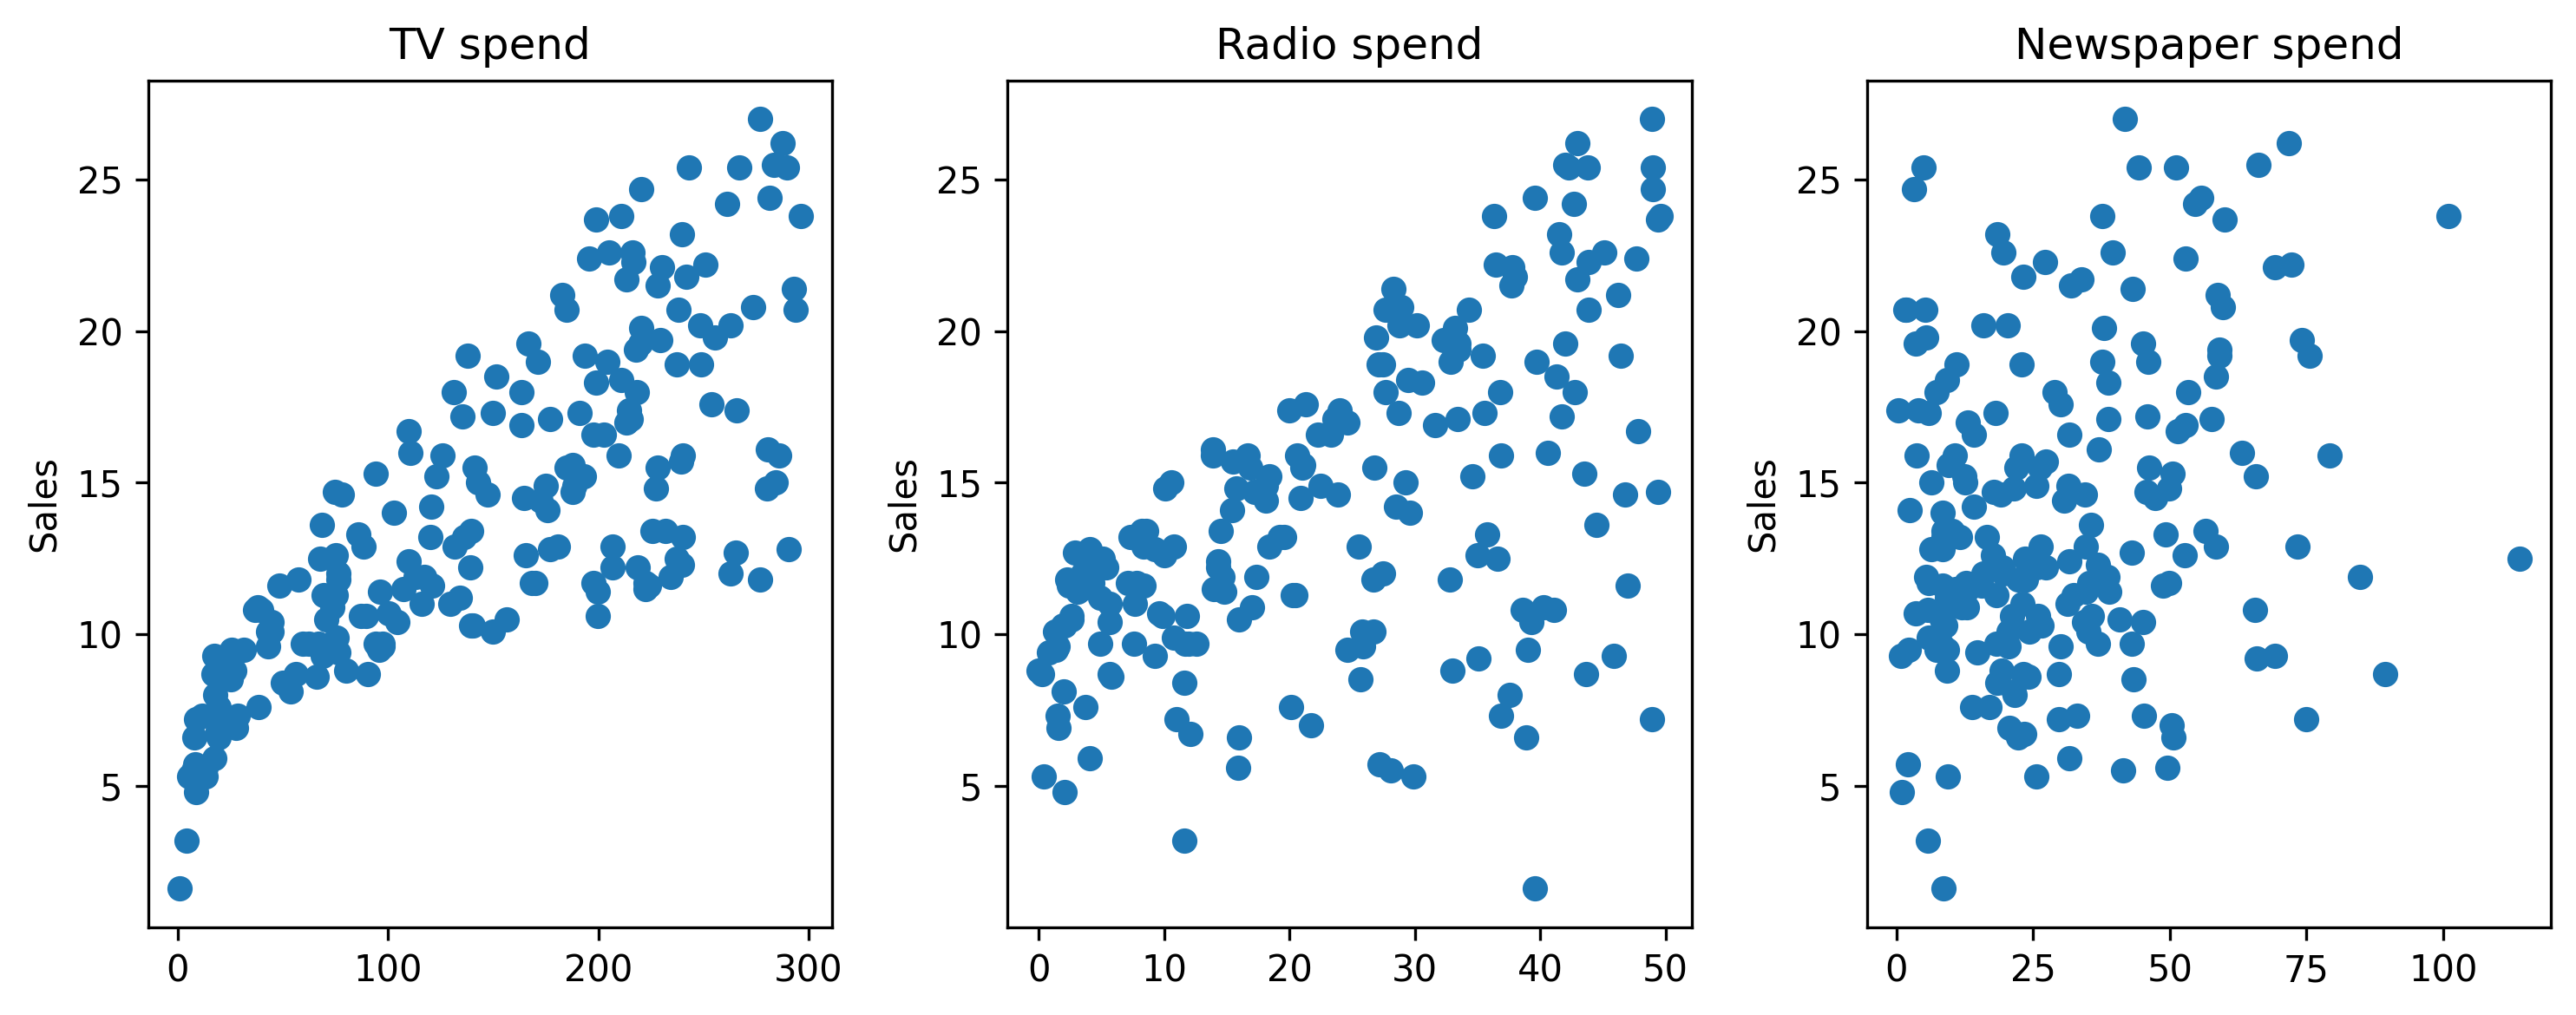

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,4), dpi=300)
axes[0].plot(df["TV"], df["sales"], "o")
axes[0].set_ylabel("Sales")
axes[0].set_title("TV spend")

axes[1].plot(df["radio"], df["sales"], "o")
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio spend")

axes[2].plot(df["newspaper"], df["sales"], "o")
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper spend")

plt.tight_layout()


* Print out all of relationship between the data

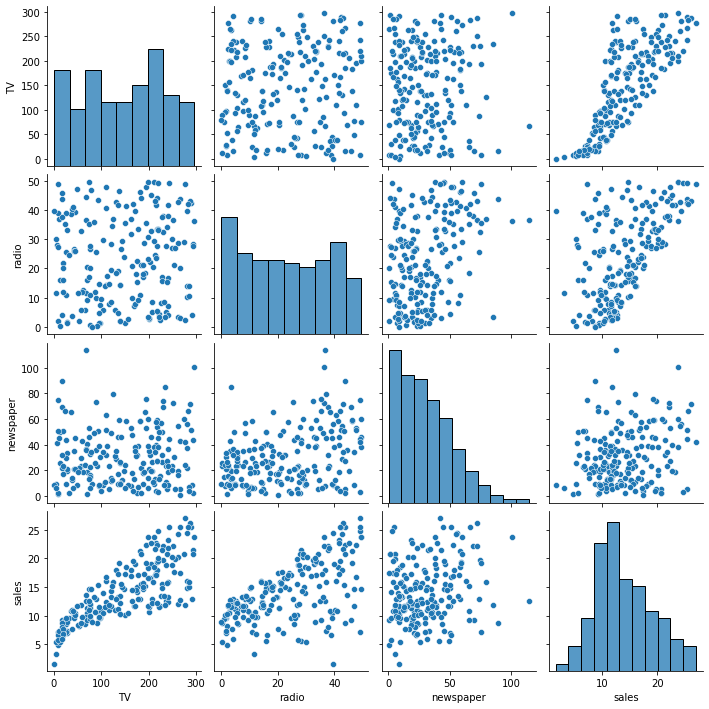

In [8]:
sns.pairplot(data=df)

* Create X features and y

In [9]:
X = df.drop(columns="sales", axis=1)

In [10]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [11]:
y = df["sales"]

In [12]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

* Create train test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

* X train accounts for 70% data

In [15]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


* X test accounts for 30% data

In [16]:
X_test

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2
119,19.4,16.0,22.3
54,262.7,28.8,15.9
74,213.4,24.6,13.1
145,140.3,1.9,9.0
142,220.5,33.2,37.9


* Corresponding to x_test

In [17]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
1      10.4
43     12.9
102    14.8
164    11.9
9      10.6
155     3.2
36     25.4
190    10.8
33     17.4
45     14.9
Name: sales, dtype: float64

* Corresponding to x_train

In [18]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

* Fit the model for the **X_train** and **y_train**

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()

In [21]:
model.fit(X_train, y_train)

LinearRegression()

* Predict for the **X_test**

In [22]:
test_prediction = model.predict(X_test)

In [23]:
test_prediction

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

## Performance evaluation
### Regression Metrics
* Now that we have a fitted model that can perform predictions based on features, how do we decide if those predictions are any good?
* Fortunately we have the known test labels to compare our results to.
* Let's take a moment now to discuss evaluating Regression Models.
* Regression is a task when a model attempts to predict continuous values (unlike categorical values, which is classification)
* For example, attempting to predict the price of a house given its features is a **regression task**.
* Attempting to predict the country a house is in given its features would be a classification task
* You may have heard of some evaluation metrics like **accuracy** or **recall**
* These sort of metrics aren't useful for regression problems, we need metrics designed for *continuous* values
* Let's discuss some of the most common evaluation metrics for regression:
    * Mean absolute error (MAE)
        * This is the mean of the absolute values of errors
        * Easy to understand
            * $\frac{1}{n}\sum_{i=1}^n|y_i-\hat{y}_i|$
            * Understand how far off are my actual predictions?
        * MAE won't punish large errors  however
        * We want our error metrics to account for large errors even just a few points
    * Mean squared error
        * Larger errors are "punished" more than with MAE, making MSE more popular
        * $\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$
        * When you squared it, the overall effects on the average of few point large errors is really far off
        * Issue with MSE:
            * Different units than y
            * It reports units of y squared
            * Report back how far you off from your squared x not x
    * Root mean square error
        * Solve the problem of Mean square error
        * Get the root of the squared errors after everything it's done
        * This is the root of the mean of the squared errors
        * Most popular (has same units as y)
        * Similar to standard deviation instead of reporting back variance
        * $\sqrt{\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2}$
        * Context is everything
        * A RMSE of $10 is fantastic for predicting the price of a house, but horrible for predicting the price of a candy bar!
        * With the RMSE = 10 dollar that's a horrible error because you are way outside the range of typical candy bars
        * Compare your error metric to the average value of the label in your data set to try to get an intuition of its overall performance
        * Domain knowledge also plays an important role here!
        * Context of importance is also necessary to consider
            * We may create a model to predict how much medication to give, in which case small fluctuations in RMSE may actually be very significant
            * If we create a model to try to improve on existing human performance, we would need some baseline RMSE to compare to
* The metrics shown here apply to any regression task, not just Linear Regression!

* Create a mean_absolute_error and mean_square_error

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
df["sales"].mean()

14.0225

<AxesSubplot:xlabel='sales', ylabel='Count'>

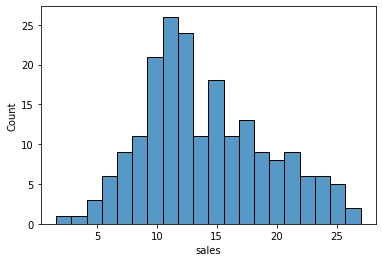

In [26]:
sns.histplot(data=df, x="sales", bins=20)

* Compare the general range of sales to mean absolute error and mean squarred error

* **Mean absolute error**

In [27]:
mean_absolute_error(y_true=y_test, y_pred=test_prediction)

1.213745773614481

* **Mean square error**

In [28]:
mean_squared_error(y_true=y_test, y_pred=test_prediction)

2.2987166978863782

* **The root of mean square error (RMSE)**

In [29]:
np.sqrt(mean_squared_error(y_true=y_test, y_pred=test_prediction))

1.516151937599388

### We need to base on historical model or the current results
* `mean_absolute_error` doesn't take into account situations where my model could be really far off a few points
* `mean_squared_error` cannot directly compare to the mean because this is now in squared terms of mean square error
* In order to solve the correct the data, we need to consider both root of mean_square_error(RMSE) and mean_absolute_error
* Consider the `mean_absolute_error` to ensure on the average the model is good
* Consider the root of `mean_squared_error` to make sure I'm not super far off for just a few data points

---
## Residual plots
* Often for Linear Regression it is  a good idea to separately evaluate residuals $(y-\hat{y})$ and not just calculate performance metrics (e.g. RMSE)
* Recall Anscombe's quartet - Clearly linear Regression is not suitable -> but we only could do this by using the one $x$ feature
* But how can we tell if we're dealing with more than one $x$ features?
* We can not see this discrepancy of fit visually if we have multiple features!
* **What we could do is plot residual error against true y values**

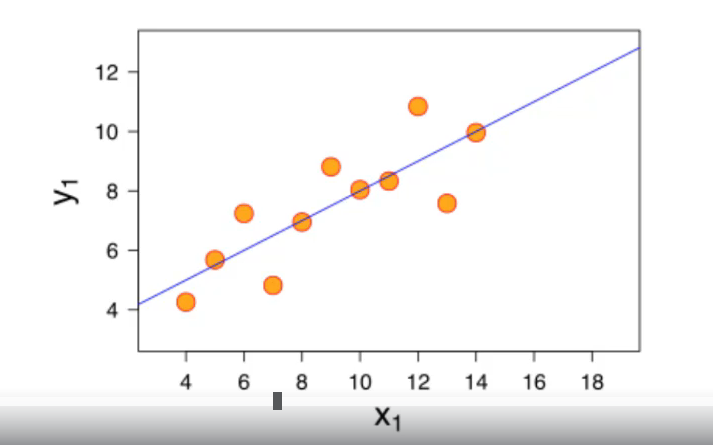

In [30]:
from PIL import Image
Image.open(r"D:\Data Science\Course-2021\08-Linear-Regression-Models\1.png")

* The residual errors should be random and close to a normal distribution
* Almost the residual should hit the zero => when distributed, are close to a mean of zero because we want them to centerd around zero since zero indicates a perfect fit
* The distributed will move positive when we overshoot and move negative when we undershoot

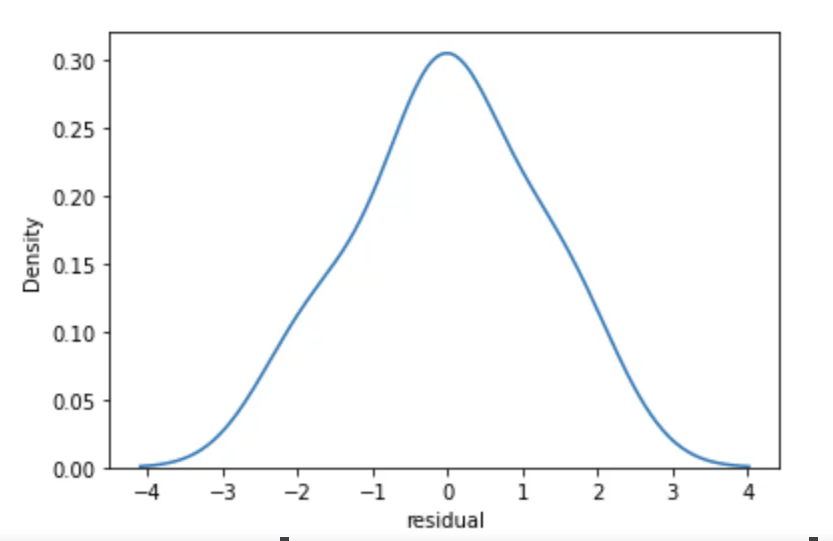

In [31]:
from PIL import Image
Image.open(r"D:\Data Science\Course-2021\08-Linear-Regression-Models\2.png")

* The residual plot shows residual error vs true y value
* There should be no clear line or curve (everything is random)

* What about non valid data sets

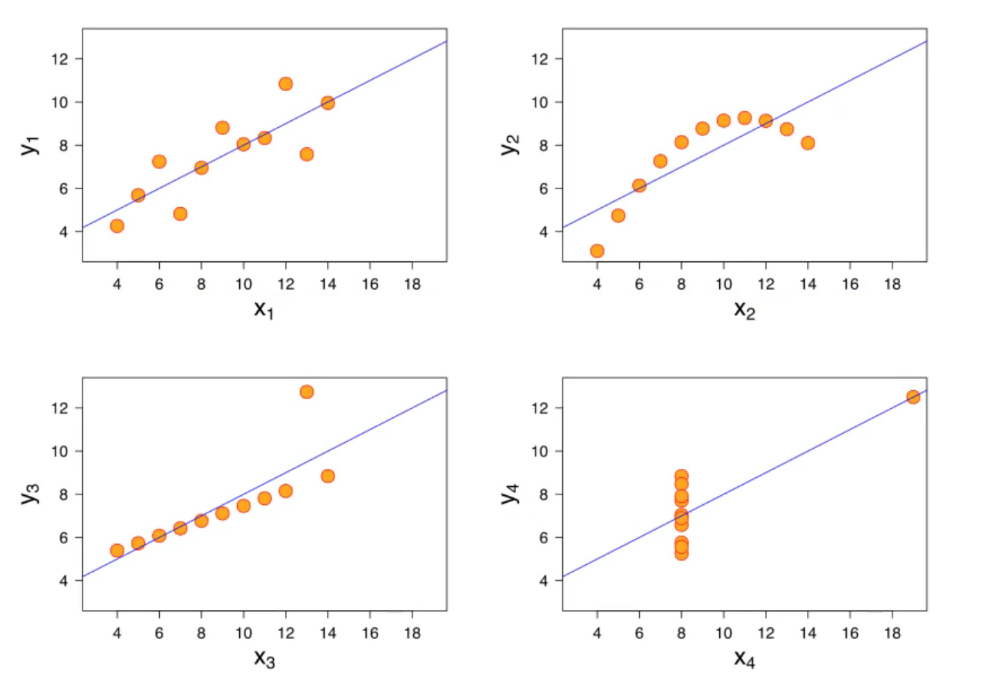

In [32]:
from PIL import Image
Image.open(r"D:\Data Science\Course-2021\08-Linear-Regression-Models\3.png")

* For the second right upper plot - show a curve plot


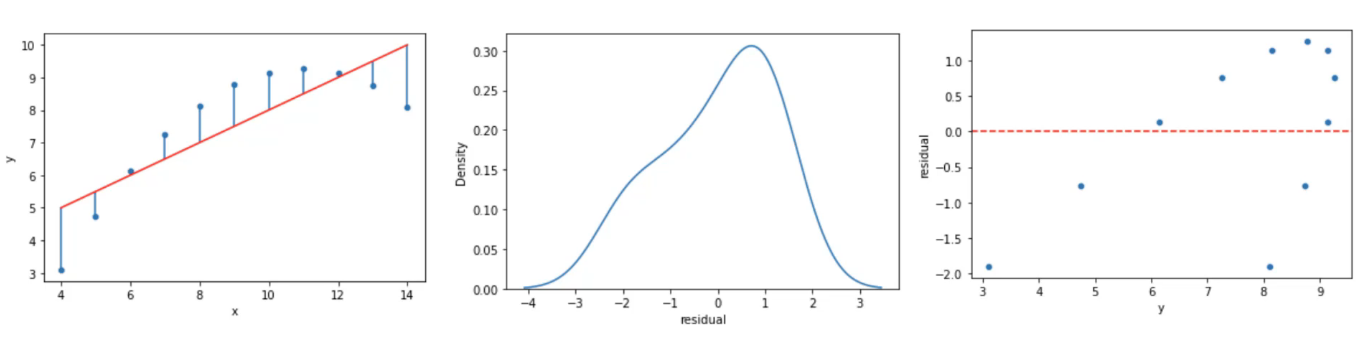

In [33]:
from PIL import Image
Image.open(r"D:\Data Science\Course-2021\08-Linear-Regression-Models\4.png")

* This not show exactly normal distributed
* Residual plot showing a clear pattern indicating Linear Regression no valid! (the 3rd plot)

* Another non-valid choice
* It almost looks like some sort of classification problem where the values are either 8 or 19

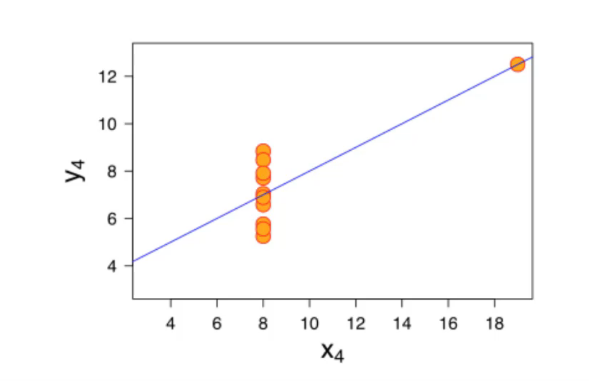

In [34]:
from PIL import Image
Image.open(r"D:\Data Science\Course-2021\08-Linear-Regression-Models\5.png")

* When you see on the distributed and linear regression, there are no problems with this data
* However when look at the residual plot. Residual plot showing a clear pattern, indicating Linear Regression no valid!

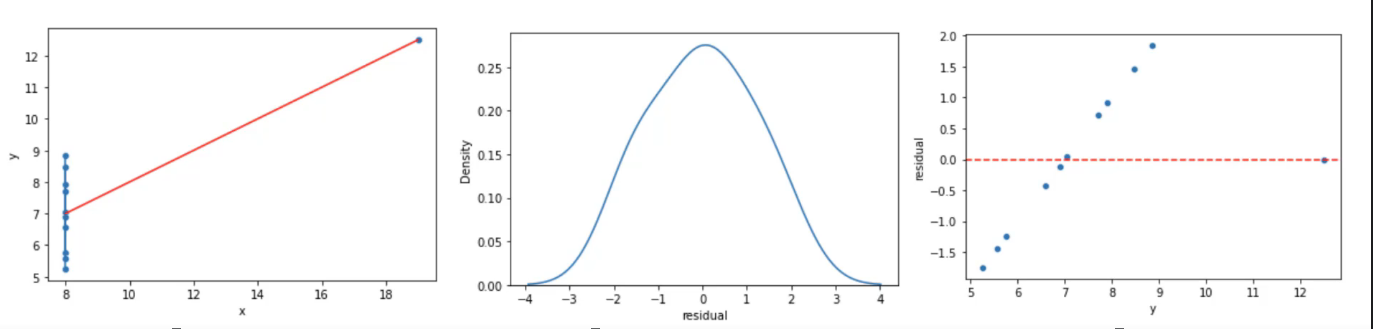

In [35]:

from PIL import Image
Image.open(r"D:\Data Science\Course-2021\08-Linear-Regression-Models\6.png")

#### Use the residual plot to make sure that the underlying data set is a valid choice


In [36]:
test_residual = y_test - test_prediction

In [37]:
test_residual

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

* Plot the relationship between the y_test and test residual
    * The data must look like random not clear line or curve

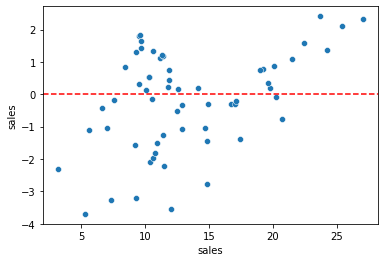

In [38]:
sns.scatterplot(x=y_test, y=test_residual)
# Plot out the line y=0
plt.axhline(y=0, color="r", ls="--")

* it seems normal distribute with the mean closes to 0

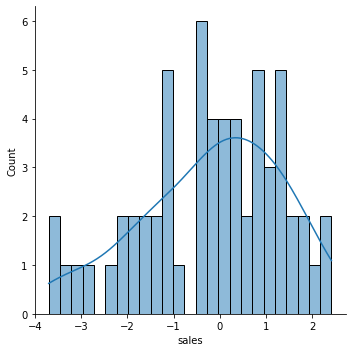

In [39]:
sns.displot(x=test_residual, bins=25, kde=True)

* **In the case, if it hard to read the normal distribution => using the probability**
    * The normal probability plot that actually allows you to compare what a perfectly normally distributed dataset would look like against your actual values

In [40]:
import scipy as sp
from scipy import stats

* The red line is normal distribution
* The blue dots really diverge from this red line at either point

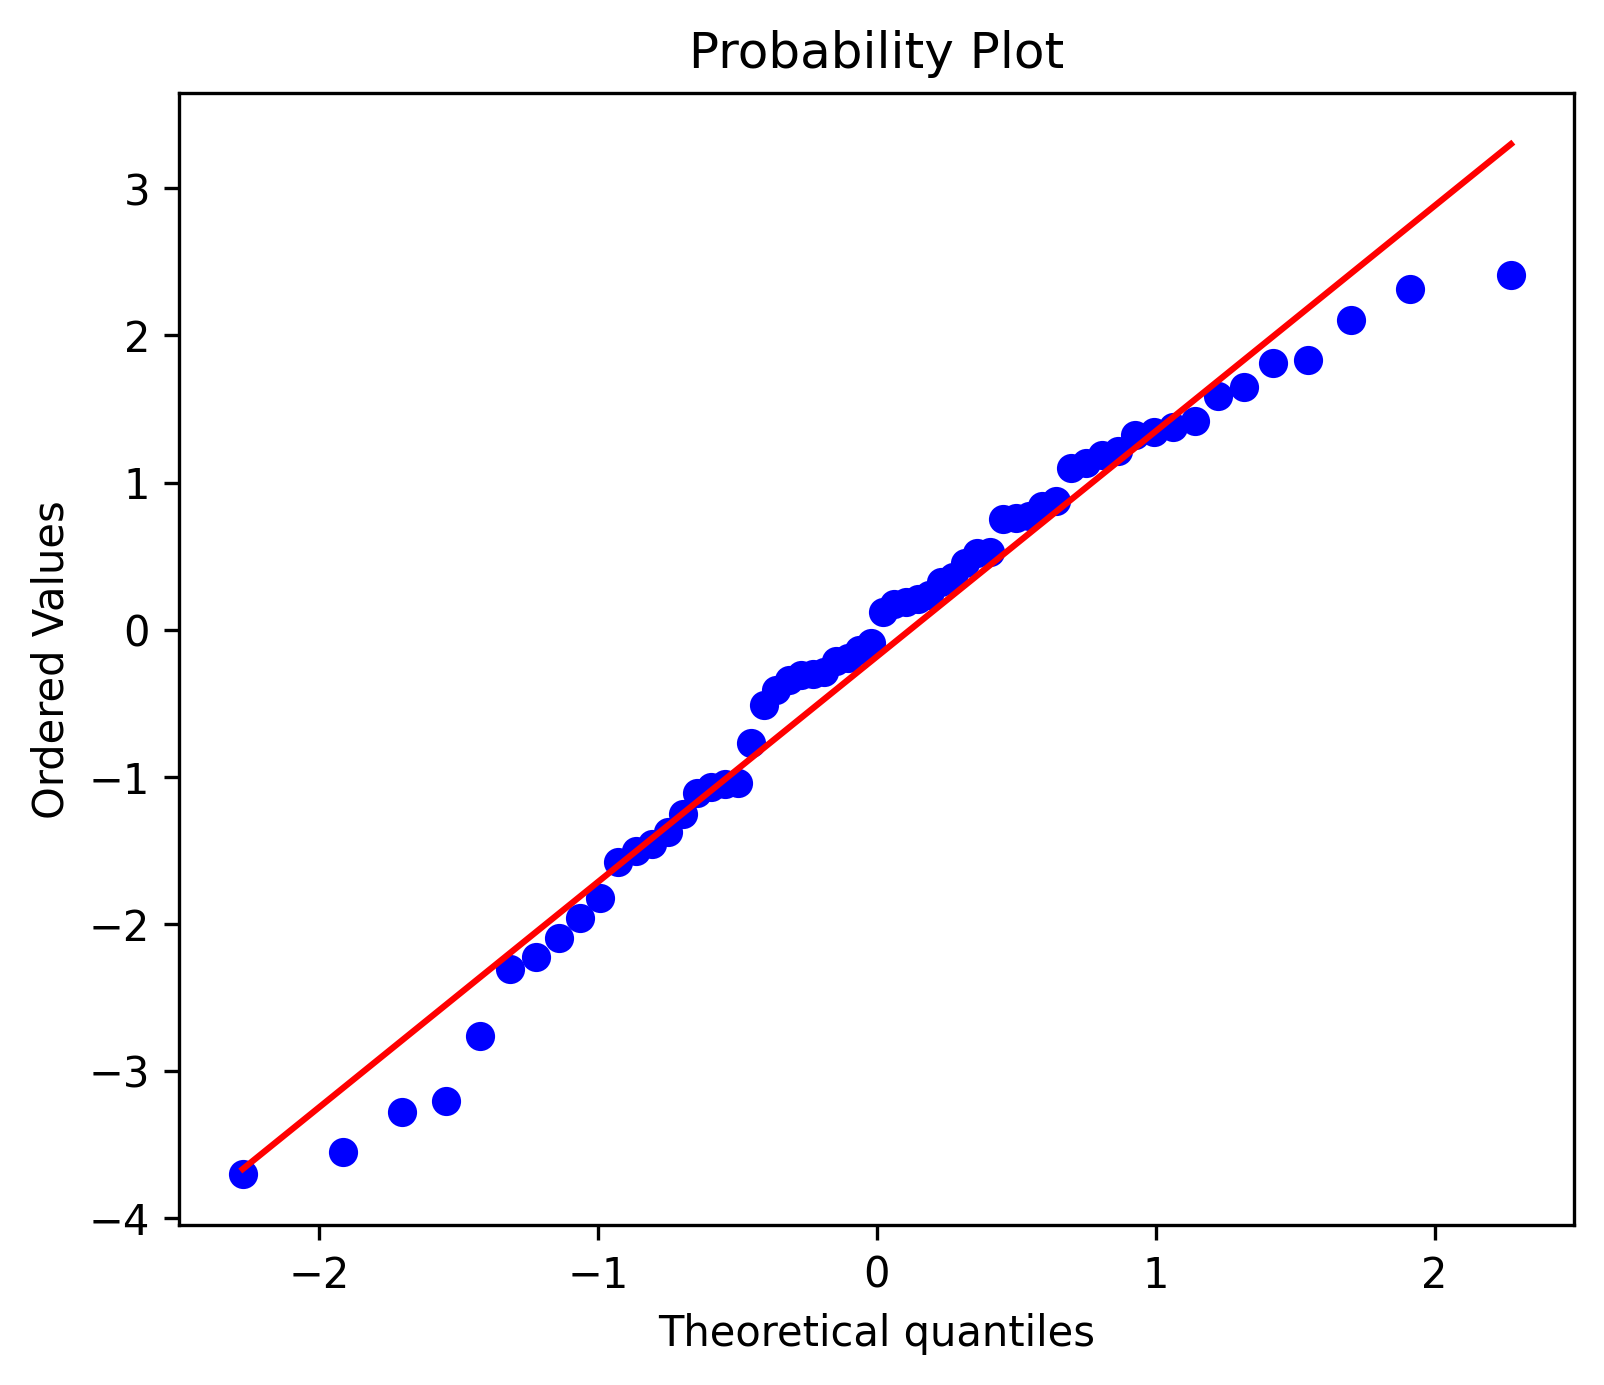

In [41]:
# Create a figure and axis to plot on
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,5), dpi=300)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these to _
_ = sp.stats.probplot(x=test_residual, plot=axes)

## Linear Regression - Model Deployment and Coefficient Interpretation
* Later on we will explore polynomial regression and regularization as model adjustments
* For now, let's focus on a simple "deployment" of our model by saving and loading it, then applying to new data


* Apply the final model

In [42]:
final_model = LinearRegression()

* Apply to X features and y

In [43]:
final_model.fit(X,y)

LinearRegression()

* Get the whole data

* return back beta coefficient
* each of beta coefficient of each column in X dataset
* The results of the newspaper is seemed close to 0
* If it was a pure zero, that means regradless of what you spend on newspaper advertising, it completely cancel out any value that you spend on newspaper
* In fact it even lower your total sales

In [44]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [45]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


* Every 1 unit of TV spend will lead to increase 0.045 sale values
* Every 1 unit of Radio spend will lead to increase 0.189 sale values
* Every 1 unit of newspapers spend will lead to decrease -0.001 sale values



* Predict the model

In [46]:
y_hat = final_model.predict(X)

* Plot out the model

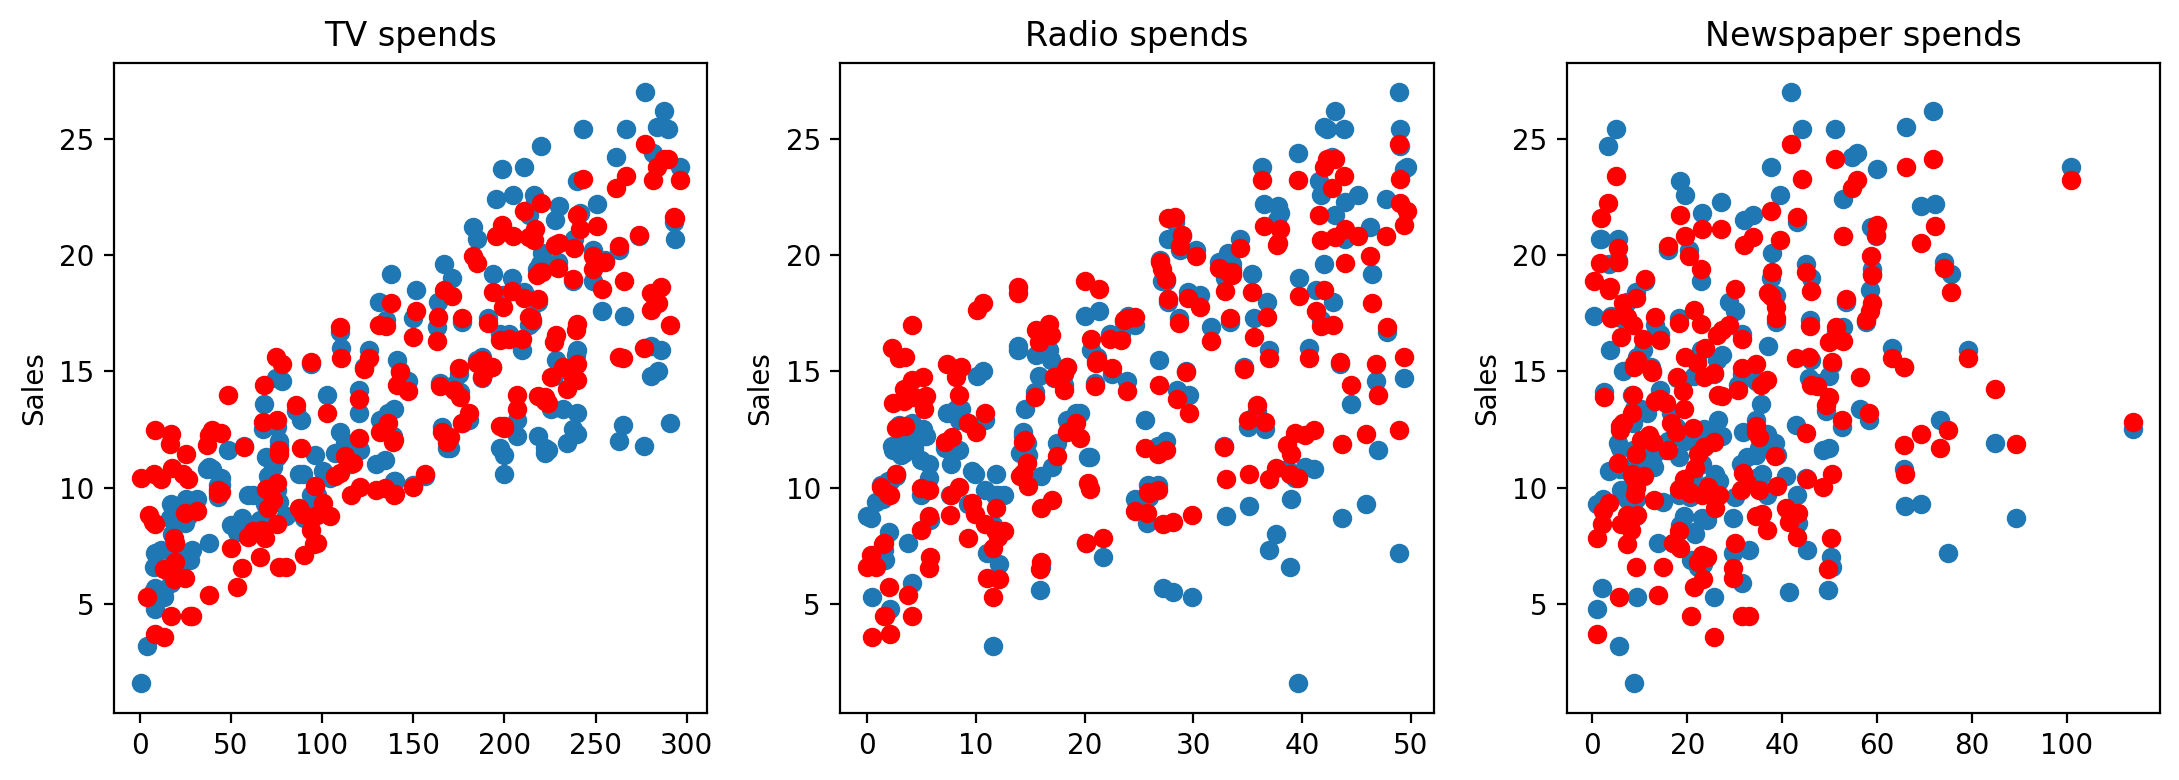

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(11,4), dpi=200)

axes[0].plot(df["TV"], df['sales'], "o")
axes[0].plot(df["TV"], y_hat, "o", color="r")
axes[0].set_ylabel("Sales")
axes[0].set_title("TV spends")

axes[1].plot(df["radio"], df['sales'], "o")
axes[1].plot(df["radio"], y_hat, "o", color="r")
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio spends")

axes[2].plot(df["newspaper"], df['sales'], "o")
axes[2].plot(df["newspaper"], y_hat, "o", color="r")
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper spends")

plt.tight_layout()


* <b>In reality, we need to normalize the number of each data column first before you even start training the model</b>
---
## Save and load the model

* Using save and load

In [48]:
from joblib import dump, load

* Save the final model

In [49]:
dump(final_model, filename="Finalmodel.joblib")

['Finalmodel.joblib']

* Load the model

In [50]:
load_model = load(filename="Finalmodel.joblib")

In [51]:
load_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

* Using  the new data
    * Put inside 2 lists

In [52]:
campaign = [[149, 22, 21]]

In [53]:
load_model.predict(campaign)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.88369456])